In [1]:
import omicverse as ov
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import gc
import os


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.3, Tutorials: https://omicverse.readthedocs.io/


In [2]:
%matplotlib inline
import omicverse as ov
ov.utils.ov_plot_set()

Dependency error: (numpy 1.26.4 (/mnt/home/yihanzhao/miniconda3/envs/zyh/lib/python3.10/site-packages), Requirement.parse('numpy<1.24,>=1.22'))


In [3]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

ModuleNotFoundError: No module named 'cellphonedb'

In [3]:
rna=sc.read_h5ad('/mnt/home/yihanzhao/RB/data_new/rb_ganguang_all.h5ad')

In [4]:
rna

AnnData object with n_obs × n_vars = 20843 × 20336
    obs: 'tissue', 'domain', 'sample', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'celltype'
    var: 'feature_types', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'celltype_colors', 'cosg', 'dendrogram_leiden', 'hvg', 'layers_counts', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'rank_genes_groups', 'sample_colors', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'scrublet', 'umap'
    obsm: 'X_mde_pca', 'X_mde_scVI', 'X_scVI', 'X_umap', 'scaled|original|X_pca'
    varm: 'scaled|original|pca_loadings'
    layers: 'counts', 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

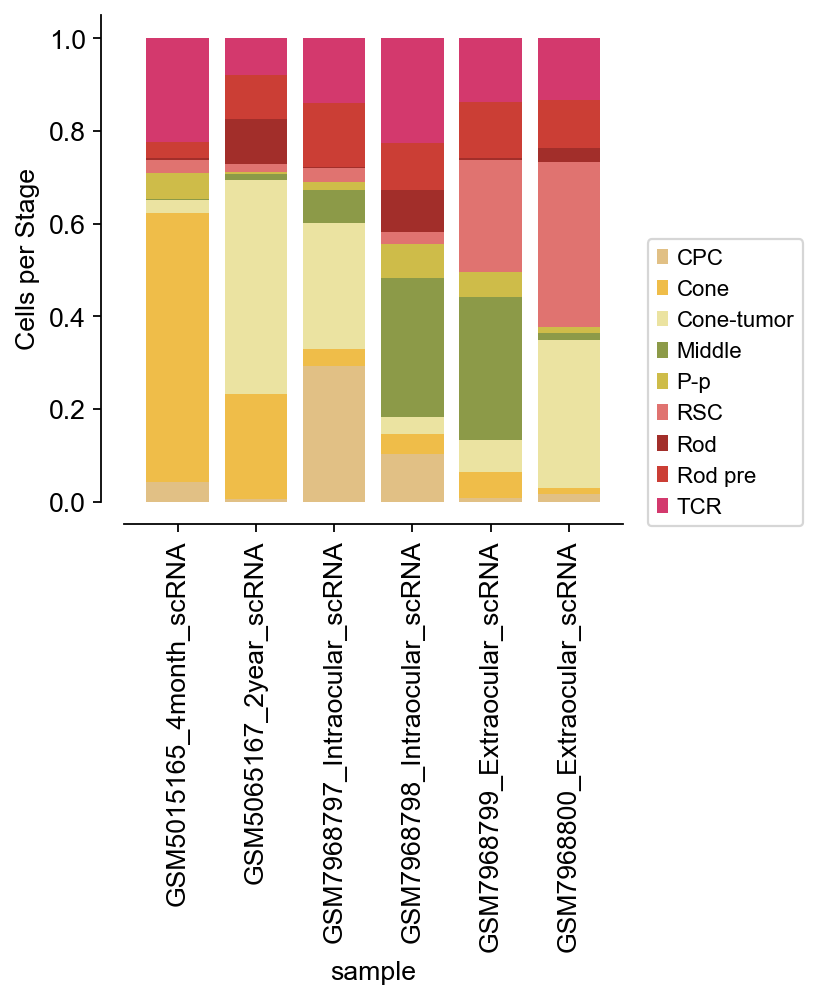

In [5]:
fig,ax=plt.subplots(figsize = (4,4))
ov.pl.cellproportion(adata=rna,celltype_clusters='celltype',
                    groupby='sample',
                     #groupby_li=['nIPC','Granule immature','Granule mature'],
                     legend=True,ax=ax)

In [6]:
import anndata
import pandas as pd

In [7]:
new_order=['CPC','Cone','Cone-tumor', 'Middle', 'P-p',
           'RSC','Rod', 'Rod pre', 'TCR'
          ]

In [8]:
rna.obs['celltype']=rna.obs['celltype'].cat.reorder_categories(new_order)

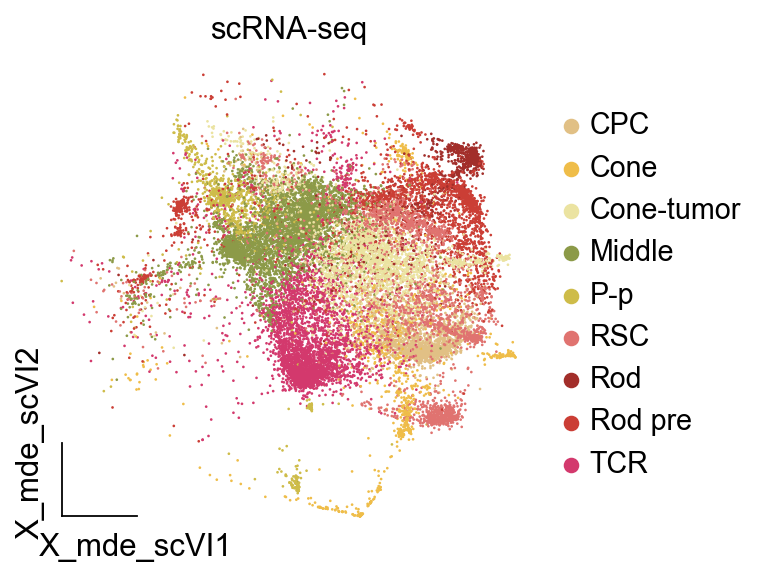

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(rna,
                   basis='X_mde_scVI',
                    frameon='small',
                   color=["celltype"],
                   title='scRNA-seq',
                   palette=ov.utils.orange_color[5:6]+ov.utils.orange_color[0:1]+ov.utils.orange_color[7:8]+ov.utils.orange_color[9:10]+ov.utils.orange_color[6:7]+ov.utils.red_color[1:2]+ov.utils.red_color[3:4]+ov.utils.red_color[2:3]+ov.utils.red_color[5:],
                   cmap='Reds',
                   ncols=3,
                  ax=ax)

In [10]:
#sc.pp.filter_cells(adata, min_genes=200)
#sc.pp.filter_genes(adata, min_cells=3)
import anndata
import pandas as pd
rna1=anndata.AnnData(rna.X,obs=pd.DataFrame(index=rna.obs.index),
                          var=pd.DataFrame(index=rna.var.index))
rna1.write_h5ad('/mnt/home/yihanzhao/RB/data_new/rna_norm_log.h5ad',compression='gzip')
rna1

AnnData object with n_obs × n_vars = 20843 × 20336

In [11]:
#meta导出
df_meta = pd.DataFrame(data={'Cell':list(rna[rna1.obs.index].obs.index),
                             'celltype':[ i for i in rna[rna1.obs.index].obs['celltype']]
                            })
df_meta.set_index('Cell', inplace=True)
df_meta.to_csv('/mnt/home/yihanzhao/RB/data_new/meta.tsv', sep = '\t')

In [14]:
cpdb_file_path = '/mnt/data/cellphonedb.zip'
meta_file_path = '/mnt/home/yihanzhao/RB/data_new/meta.tsv'
counts_file_path = '/mnt/home/yihanzhao/RB/data_new/rna_norm_log.h5ad'
microenvs_file_path = None
out_path ='/mnt/home/yihanzhao/RB/data_new/test_cellphone'

In [15]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellPhoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix.
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 4,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/mnt/home/yihanzhao/RB/data_new/rna_norm_log.h5ad
/mnt/home/yihanzhao/RB/data_new/meta.tsv
[ ][CORE][30/05/24-22:40:30][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:4 Precision:3
[ ][CORE][30/05/24-22:40:30][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][30/05/24-22:40:32][INFO] Running Real Analysis
[ ][CORE][30/05/24-22:40:32][INFO] Running Statistical Analysis


100%|████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:38<00:00,  6.30it/s]

[ ][CORE][30/05/24-22:43:11][INFO] Building Pvalues result


[ ][CORE][30/05/24-22:43:11][INFO] Building results
Saved deconvoluted to /mnt/home/yihanzhao/RB/data_new/test_cellphone/statistical_analysis_deconvoluted_05_30_2024_224311.txt
Saved deconvoluted_percents to /mnt/home/yihanzhao/RB/data_new/test_cellphone/statistical_analysis_deconvoluted_percents_05_30_2024_224311.txt
Saved means to /mnt/home/yihanzhao/RB/data_new/test_cellphone/statistical_analysis_means_05_30_2024_224311.txt
Saved pvalues to /mnt/home/yihanzhao/RB/data_new/test_cellphone/statistical_analysis_pvalues_05_30_2024_224311.txt
Saved significant_means to /mnt/home/yihanzhao/RB/data_new/test_cellphone/statistical_analysis_significant_means_05_30_2024_224311.txt


{'deconvoluted':              gene_name uniprot  is_complex protein_name  \
 multidata_id                                              
 1355           UBASH3B  Q8TF42        True  UBS3B_HUMAN   
 1355           UBASH3B  Q8TF42        True  UBS3B_HUMAN   
 1356           SULT1A1  P50225        True  ST1A1_HUMAN   
 1356           SULT1A1  P50225        True  ST1A1_HUMAN   
 1356           SULT1A1  P50225        True  ST1A1_HUMAN   
 ...                ...     ...         ...          ...   
 1107             NPY1R  P25929       False  NPY1R_HUMAN   
 1125             NPY2R  P49146       False  NPY2R_HUMAN   
 1125             NPY2R  P49146       False  NPY2R_HUMAN   
 1106             NPY5R  Q15761       False  NPY5R_HUMAN   
 1106             NPY5R  Q15761       False  NPY5R_HUMAN   
 
                               complex_name id_cp_interaction     gene    CPC  \
 multidata_id                                                                   
 1355          Dehydroepiandrosterone_by

In [9]:
time_t='05_30_2024_224311'

In [10]:
deconvoluted=ov.read(f'/mnt/home/yihanzhao/RB/data_new/test_cellphone/statistical_analysis_deconvoluted_{time_t}.txt')
means=ov.read(f'/mnt/home/yihanzhao/RB/data_new/test_cellphone/statistical_analysis_means_{time_t}.txt')
pvalues=ov.read(f'/mnt/home/yihanzhao/RB/data_new/test_cellphone/statistical_analysis_pvalues_{time_t}.txt')
significant_means=ov.read(f'/mnt/home/yihanzhao/RB/data_new/test_cellphone/statistical_analysis_significant_means_{time_t}.txt')

In [11]:
interaction=ov.single.cpdb_network_cal(adata = rna,
        pvals = pvalues,
        celltype_key = "celltype",)   

ktplotspy have been install version: 0.2.4


In [12]:
interaction['interaction_edges'].head()

,SOURCE,TARGET,COUNT
0,CPC,CPC,185
1,CPC,Cone,121
2,CPC,Cone-tumor,175
3,CPC,Middle,168
4,CPC,P-p,193


ktplotspy have been install version: 0.2.4


<AxesSubplot: title={'center': 'regulatory network'}>

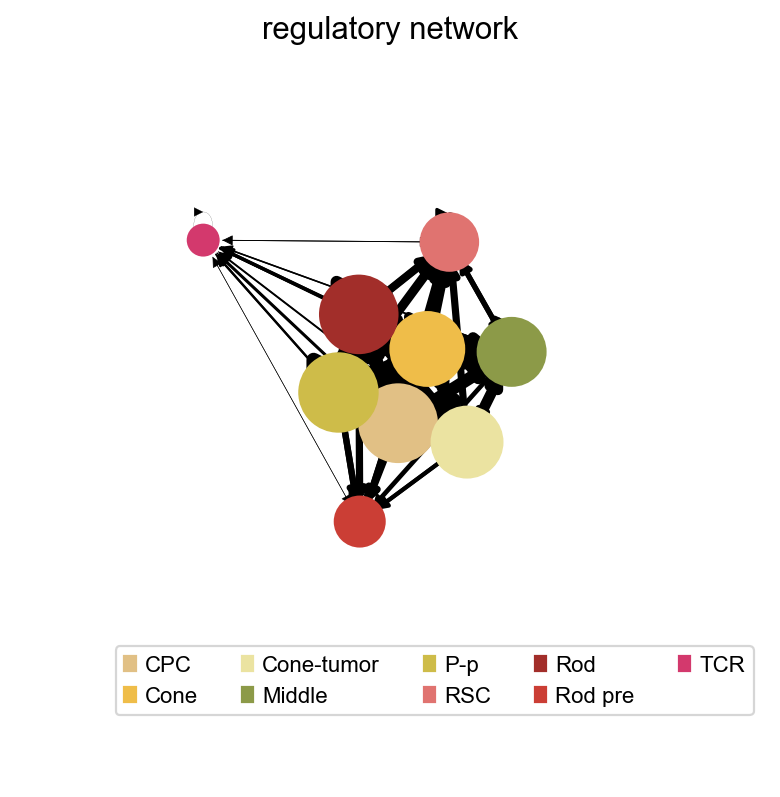

In [13]:
#细胞互作图
ov.single.cpdb_plot_network(adata=rna,
                  interaction_edges=interaction['interaction_edges'],
                  celltype_key='celltype',
                  nodecolor_dict=None,title='regulatory network',
                  edgeswidth_scale=30,nodesize_scale=2, #可调参数使图形更好看
                  pos_scale=1,pos_size=9,figsize=(6,6),
                  legend_ncol=5,legend_bbox=(1,0.2),legend_fontsize=10)

In [14]:
cell_type_cat=['CPC','Cone','Cone-tumor', 'Middle', 'P-p',
           'RSC','Rod', 'Rod pre', 'TCR']

In [15]:
sub_i=interaction['interaction_edges']
sub_i=sub_i.loc[sub_i['SOURCE'].isin(cell_type_cat)]
sub_i=sub_i.loc[sub_i['TARGET'].isin(['P-p', 'Cone', 'Cone-tumor'])] #突出标明某些亚型

ktplotspy have been install version: 0.1.8


Text(0.5, 1.0, 'regulatory network')

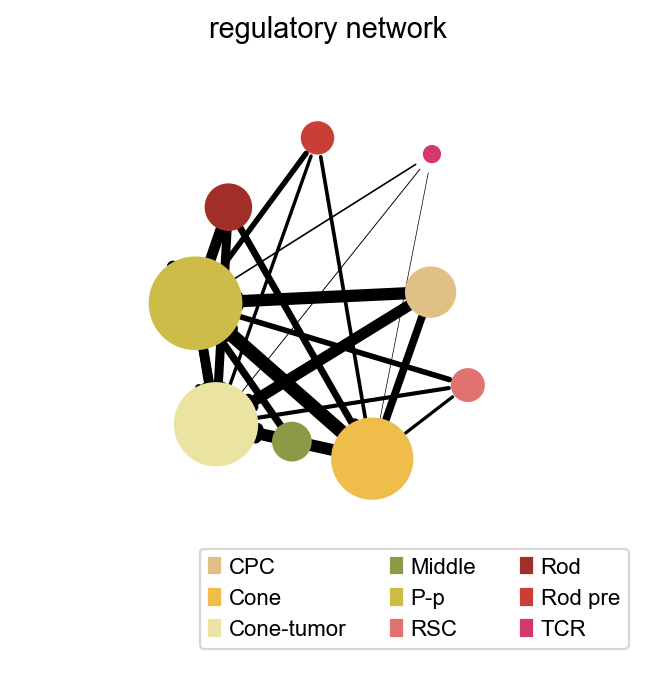

In [53]:
import matplotlib.pyplot as plt
ax=ov.single.cpdb_plot_network(adata=rna,
                  interaction_edges=sub_i,
                  celltype_key='celltype',
                  nodecolor_dict=None,title='Macrophage-Receptor Network',
                  edgeswidth_scale=35,nodesize_scale=1,
                  pos_scale=1,pos_size=50,figsize=(5,5),
                  legend_ncol=3,legend_bbox=(1,0.2),legend_fontsize=10)
plt.title('regulatory network',fontsize=13,)

In [16]:
sub_i.groupby('TARGET').count()

,SOURCE,COUNT
TARGET,,
Cone,9,9
Cone-tumor,9,9
P-p,9,9


In [17]:
sub_i.groupby(['SOURCE',]).agg({'COUNT': 'mean'}).sort_values('COUNT')

,COUNT
SOURCE,
TCR,17.333333
Rod pre,65.666667
RSC,68.000000
Middle,95.000000
Cone-tumor,125.333333
Rod,138.666667
P-p,152.333333
CPC,163.000000
Cone,174.666667


In [18]:
count_dict=dict(zip(sub_i.groupby(['SOURCE',]).agg({'COUNT': 'mean'}).sort_values('COUNT').index.tolist(),
                   sub_i.groupby(['SOURCE',]).agg({'COUNT': 'mean'}).sort_values('COUNT')['COUNT'].tolist()))

In [19]:
count_dict

{'TCR': 17.333333333333332,
 'Rod pre': 65.66666666666667,
 'RSC': 68.0,
 'Middle': 95.0,
 'Cone-tumor': 125.33333333333333,
 'Rod': 138.66666666666666,
 'P-p': 152.33333333333334,
 'CPC': 163.0,
 'Cone': 174.66666666666666}

In [20]:
color_dict=['#d3396d',#tcr
            '#cb3e35', #pre
            '#e07370',#rsc
            '#8c9a48', #middle
            '#ebe3a1', #tumor
            '#a22e2a',#rod
            '#cebc49', #pp
            '#e1c085', #cpc
            '#efbd49', #cone
            
           ]

Text(0.5, 1.0, 'Average Number of L-R')

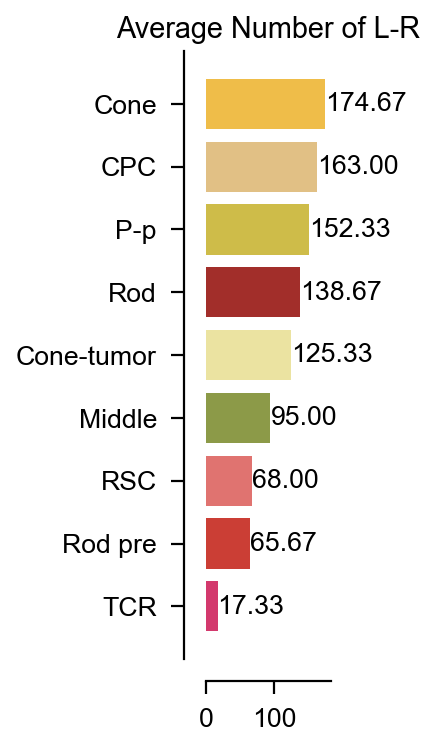

In [21]:
fig, ax = plt.subplots(figsize=(1,5))
ax.barh(y=list(count_dict.keys()),
     width=list(count_dict.values()),
      color=color_dict
       )
for idx,i in enumerate(list(count_dict.keys())):
    ax.text(count_dict[i]+0.005,idx,'{:.2f}'.format(count_dict[i]),
            fontsize=12,verticalalignment='center')
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Average Number of L-R',fontsize=13)

In [22]:
sub_i.groupby(['SOURCE']).agg({'COUNT': 'sum'})

,COUNT
SOURCE,
CPC,489
Cone,524
Cone-tumor,376
Middle,285
P-p,457
RSC,204
Rod,416
Rod pre,197
TCR,52


In [23]:
sub_i.groupby(['SOURCE','TARGET']).agg({'COUNT': 'sum'})

COUNT
SOURCE     TARGET           
CPC        Cone          121
           Cone-tumor    175
           P-p           193
Cone       Cone          120
           Cone-tumor    188
           P-p           216
Cone-tumor Cone          103
           Cone-tumor    117
           P-p           156
Middle     Cone           81
           Cone-tumor     90
           P-p           114
P-p        Cone          121
           Cone-tumor    143
           P-p           193
RSC        Cone           51
           Cone-tumor     65
           P-p            88
Rod        Cone          107
           Cone-tumor    142
           P-p           167
Rod pre    Cone           58
           Cone-tumor     53
           P-p            86
TCR        Cone           11
           Cone-tumor     15
           P-p            26

In [24]:
p1=sub_i.groupby(['SOURCE','TARGET']).agg({'COUNT': 'sum'})/sub_i.groupby(['SOURCE']).agg({'COUNT': 'sum'})

In [25]:
p1.loc['CPC']

,COUNT
TARGET,
Cone,0.247444
Cone-tumor,0.357873
P-p,0.394683


In [26]:
import pandas as pd

In [27]:
plot_data=pd.DataFrame(columns=['TARGET','rate','SOURCE'])
for ct in ['CPC','Middle',
           'RSC','Rod', 'Rod pre', 'TCR','P-p','Cone','Cone-tumor']:
    plot_data1=pd.DataFrame()
    plot_data1['TARGET']=p1.loc[ct].index.tolist()
    plot_data1['rate']=p1.loc[ct]['COUNT'].tolist()
    plot_data1['SOURCE']=ct
    plot_data=pd.concat([plot_data,plot_data1])
plot_data.head()

,TARGET,rate,SOURCE
0,Cone,0.247444,CPC
1,Cone-tumor,0.357873,CPC
2,P-p,0.394683,CPC
0,Cone,0.284211,Middle
1,Cone-tumor,0.315789,Middle


In [28]:
import numpy as np

In [29]:
list(count_dict.keys())

['TCR', 'Rod pre', 'RSC', 'Middle', 'Cone-tumor', 'Rod', 'P-p', 'CPC', 'Cone']

In [30]:
count_dict

{'TCR': 17.333333333333332,
 'Rod pre': 65.66666666666667,
 'RSC': 68.0,
 'Middle': 95.0,
 'Cone-tumor': 125.33333333333333,
 'Rod': 138.66666666666666,
 'P-p': 152.33333333333334,
 'CPC': 163.0,
 'Cone': 174.66666666666666}

In [31]:
color_dict = {
    'P-p': '#cebc49',          # 细胞亚型1的颜色，例如蓝色
    'Cone': '#efbd49',         # 细胞亚型2的颜色，例如橙色
    'Cone-tumor': '#ebe3a1' ,
}


[0.5        0.43654822 0.43137255 0.4        0.41489362 0.40144231
 0.42231947 0.39468303 0.41221374]
[0.71153846 0.73096447 0.68137255 0.68421053 0.68882979 0.65865385
 0.68708972 0.64212679 0.64122137]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0.5, 1.0, 'Rate Target of L-R')

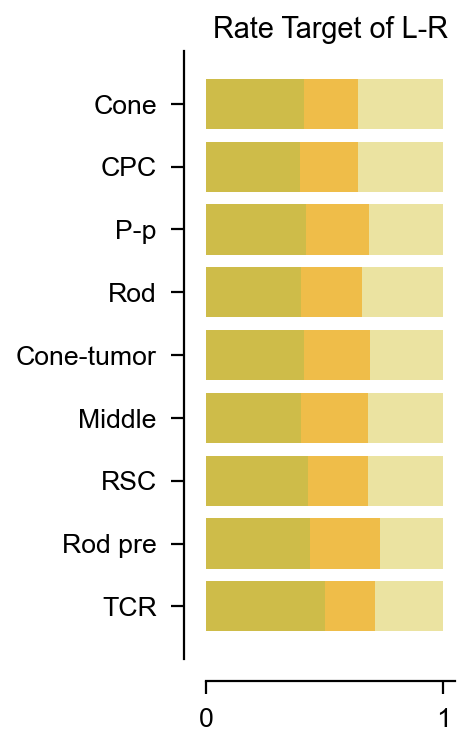

In [32]:
fig, ax = plt.subplots(figsize=(2,5))
for idx,tumor in enumerate(['P-p', 'Cone', 'Cone-tumor'
       ]):
    if idx==0:
        p2=plot_data.loc[plot_data['TARGET']==tumor]
        p2.index=p2['SOURCE']
        p2=p2.loc[list(count_dict.keys())]
        ax.barh(y=list(p2['SOURCE'].tolist()),
             width=list(p2['rate'].tolist()),
               color=color_dict[tumor])
        bottom=np.array(list(p2['rate'].tolist()))
    else:
        p2=plot_data.loc[plot_data['TARGET']==tumor]
        p2.index=p2['SOURCE']
        p2=p2.loc[list(count_dict.keys())]
        ax.barh(y=list(p2['SOURCE'].tolist()),
             width=list(p2['rate'].tolist()),
                left=bottom,
               color=color_dict[tumor])
        bottom+=np.array(list(p2['rate'].tolist()))
    print(bottom)

plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Rate Target of L-R',fontsize=13)

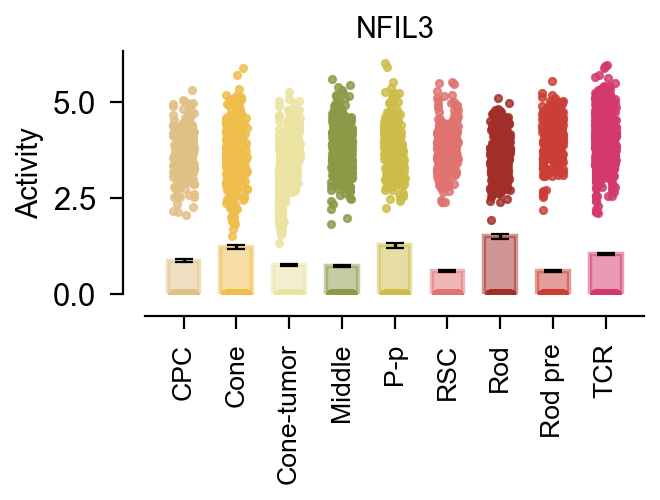

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,2))
ov.pl.bardotplot(rna,groupby='celltype',color='NFIL3',figsize=(6,2),
           ax=ax,
          ylabel='Activity',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})

In [34]:
sub_means=ov.single.cpdb_submeans_exacted(means,cell_names='P-p|Cone|Cone-tumor',cell_type='receptor')

In [35]:
sub_means=sub_means.loc[~sub_means['gene_a'].isnull()]
sub_means=sub_means.loc[~sub_means['gene_b'].isnull()]

In [36]:
sub_means

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,RSC|P-p,Rod|Cone,Rod|Cone-tumor,Rod|P-p,Rod pre|Cone,Rod pre|Cone-tumor,Rod pre|P-p,TCR|Cone,TCR|Cone-tumor,TCR|P-p
9,CPI-SS0F66EA6BE,APP_FPR2,simple:P05067,simple:P25090,APP,FPR2,False,False,True,curated,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10,CPI-SS030BB46BB,ANXA1_FPR2,simple:P04083,simple:P25090,ANXA1,FPR2,True,False,True,curated,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
12,CPI-SS07ACDDCD6,APP_SORL1,simple:P05067,simple:Q92673,APP,SORL1,True,False,True,curated,...,2.616,2.606,2.552,2.746,2.418,2.364,2.557,1.984,1.931,2.124
13,CPI-SS097A84265,APP_TNFRSF21,simple:P05067,simple:O75509,APP,TNFRSF21,False,False,True,curated,...,2.046,2.186,2.293,2.176,1.997,2.104,1.987,1.564,1.671,1.554
14,CPI-SS012E7C8B8,PI16_TNFRSF21,simple:Q6UXB8,simple:O75509,PI16,TNFRSF21,True,False,True,curated,...,0.000,0.233,0.340,0.223,0.232,0.339,0.222,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,CPI-SS0A9F17199,PYY_NPY1R,simple:P10082,simple:P25929,PYY,NPY1R,True,False,True,curated,...,0.120,0.092,0.099,0.122,0.108,0.115,0.138,0.069,0.076,0.099
1915,CPI-SS0E2083FAC,NPY_NPY2R,simple:P01303,simple:P49146,NPY,NPY2R,True,False,True,curated,...,0.014,0.000,0.000,0.000,0.000,0.005,0.014,0.000,0.006,0.014
1916,CPI-SS0FEF2FF5D,PYY_NPY2R,simple:P10082,simple:P49146,PYY,NPY2R,True,False,True,curated,...,0.092,0.000,0.086,0.094,0.000,0.102,0.110,0.000,0.063,0.071
1917,CPI-SS0D9B4021E,NPY_NPY5R,simple:P01303,simple:Q15761,NPY,NPY5R,True,False,True,curated,...,0.020,0.000,0.000,0.000,0.004,0.010,0.019,0.004,0.011,0.020


In [37]:
sub_means.columns[:10]

Index(['id_cp_interaction', 'interacting_pair', 'partner_a', 'partner_b',
       'gene_a', 'gene_b', 'secreted', 'receptor_a', 'receptor_b',
       'annotation_strategy'],
      dtype='object')

In [38]:
receptor_names=sub_means.columns[sub_means.columns.str.contains('LC\|')].tolist()
receptor_sub=sub_means[sub_means.columns[:10].tolist()+receptor_names]
receptor_sub

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy
9,CPI-SS0F66EA6BE,APP_FPR2,simple:P05067,simple:P25090,APP,FPR2,False,False,True,curated
10,CPI-SS030BB46BB,ANXA1_FPR2,simple:P04083,simple:P25090,ANXA1,FPR2,True,False,True,curated
12,CPI-SS07ACDDCD6,APP_SORL1,simple:P05067,simple:Q92673,APP,SORL1,True,False,True,curated
13,CPI-SS097A84265,APP_TNFRSF21,simple:P05067,simple:O75509,APP,TNFRSF21,False,False,True,curated
14,CPI-SS012E7C8B8,PI16_TNFRSF21,simple:Q6UXB8,simple:O75509,PI16,TNFRSF21,True,False,True,curated
...,...,...,...,...,...,...,...,...,...,...
1914,CPI-SS0A9F17199,PYY_NPY1R,simple:P10082,simple:P25929,PYY,NPY1R,True,False,True,curated
1915,CPI-SS0E2083FAC,NPY_NPY2R,simple:P01303,simple:P49146,NPY,NPY2R,True,False,True,curated
1916,CPI-SS0FEF2FF5D,PYY_NPY2R,simple:P10082,simple:P49146,PYY,NPY2R,True,False,True,curated
1917,CPI-SS0D9B4021E,NPY_NPY5R,simple:P01303,simple:Q15761,NPY,NPY5R,True,False,True,curated


In [39]:
import networkx as nx
G = nx.DiGraph()
myeloid_dict={}
for i in ['CPC','Middle',
           'RSC','Rod', 'Rod pre', 'TCR','P-p','Cone','Cone-tumor']:
    myeloid_dict[i]=[]
    if '+' in i:
        name=i[:-1]
        receptor_names=sub_means.columns[sub_means.columns.str.contains(f'{name}\+\|')].tolist()
    else:
        receptor_names=sub_means.columns[sub_means.columns.str.contains(f'{i}\|')].tolist()
    receptor_sub=sub_means[sub_means.columns[:10].tolist()+receptor_names]
    for j in receptor_sub.index:
        if receptor_sub.loc[j,receptor_names].sum()>2:
            
            for rece in receptor_names:
                if receptor_sub.loc[j,rece]>2:
                    myeloid_dict[i].append(receptor_sub.loc[j,'gene_a'])
                    G.add_edge(i,'L:{0}'.format(receptor_sub.loc[j,'gene_a']))
                    G.add_edge('L:{0}'.format(receptor_sub.loc[j,'gene_a']),'R:{0}'.format(receptor_sub.loc[j,'gene_b']))
                    G.add_edge('R:{0}'.format(receptor_sub.loc[j,'gene_b']),rece.split('|')[1])
    myeloid_dict[i]=list(set(myeloid_dict[i]))

In [40]:
myeloid_dict['Rod pre']

['CADM3',
 'LRPAP1',
 'AGRN',
 'NRXN2',
 'PPIA',
 'CRTAM',
 'APP',
 'APLP2',
 'NRXN1',
 'RBP4',
 'NCAM1',
 'NELL2',
 'CNTN1',
 'TULP1',
 'LGALS9',
 'CADM1',
 'JAM2',
 'CDH2',
 'MDK']

In [41]:
color_dict=dict(zip(rna.obs['celltype'].cat.categories,rna.uns['celltype_colors']))
#color_dict['gene']='#3b9868'
color_dict['ligand']='#a51616'
color_dict['receptor']='#c2c2c2'

In [42]:
p=dict(G.nodes)

In [43]:
color_li=[]

for i in p.keys():
    if i in cell_type_cat:
        color_li.append(color_dict[i])
    elif i in ['P-p', 'Cone', 'Cone-tumor']:
        color_li.append(color_dict[i])
        #print(i)
    elif 'L:' in i:
        color_li.append(color_dict['ligand'])
    elif 'R:' in i:
        color_li.append(color_dict['receptor'])
    else:
        color_li.append('#000000')

In [45]:
pip install pygraphviz

Note: you may need to restart the kernel to use updated packages.


(17.702675000000003, 435.352325, -11.844150000000003, 332.07415000000003)

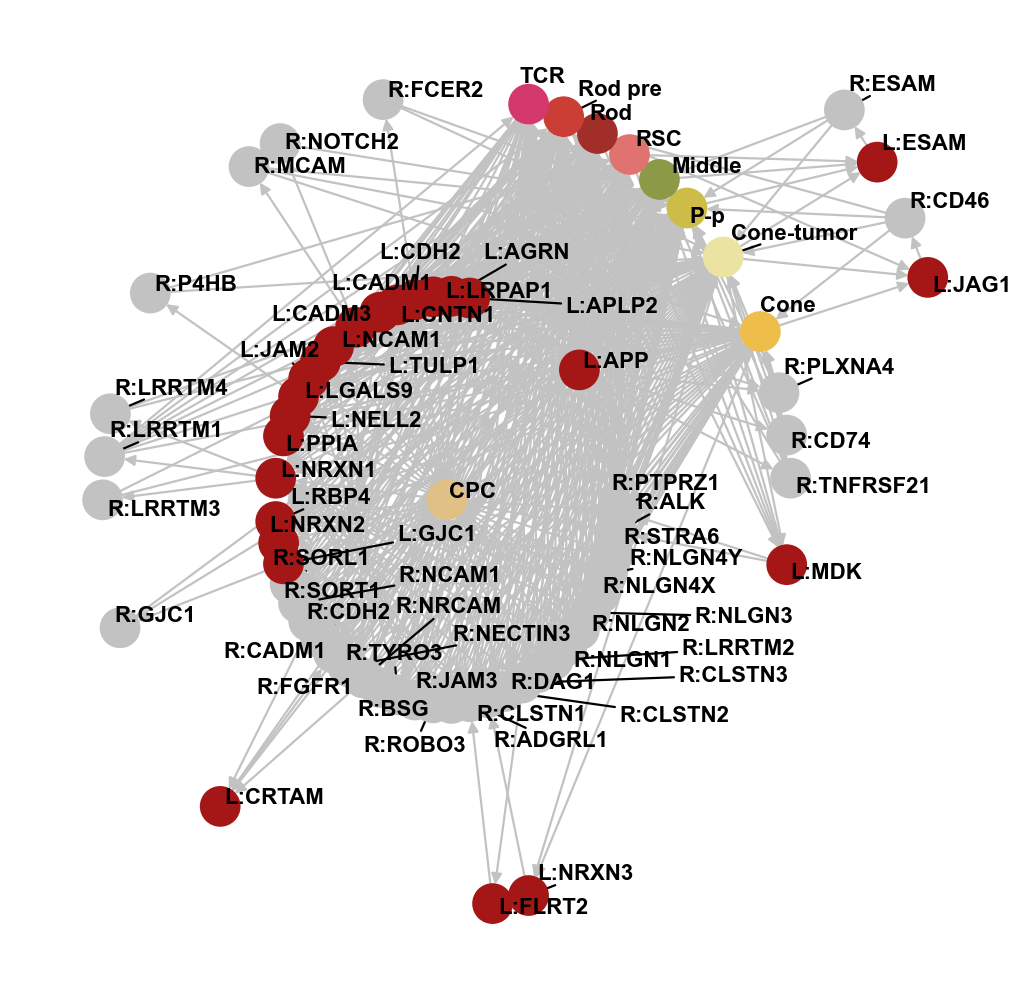

In [46]:
fig, ax = plt.subplots(figsize=(8,8)) 
pos = nx.spring_layout(G, scale=1, k=0.5)
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")


#nodesize=np.array([G_nodes_dict[u] for u in G.nodes()])/nodesize_scale
#nodecolos=[type_color_all[u] for u in G.nodes()]
nx.draw_networkx_nodes(G, pos, nodelist=p,node_color=color_li,
                       #node_size=nodesize,
                      )
nx.draw_networkx_edges(G, pos,edge_color='#c2c2c2')
plt.grid(False)

hub_gene=list(p.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")

In [ ]:
enr=ov.bulk.geneset_enrichment(gene_list=list(set(all_receptor)),
                                pathways_dict=pathway_dict,
                                pvalue_type='normal',
                                organism='human')

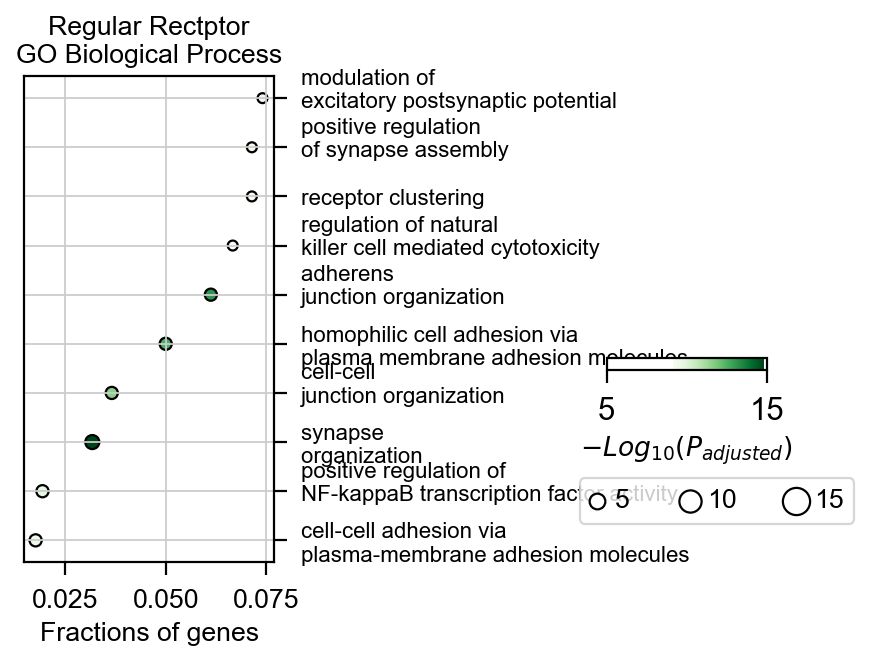

In [80]:
ax=ov.bulk.geneset_plot(enr,figsize=(2,4),fig_title='Regular Rectptor\nGO Biological Process',
                    cax_loc=[2, 0.45, 0.5, 0.02],
                    bbox_to_anchor_used=(-0.25, -13),node_diameter=10,
                    cmap='Greens',custom_ticks=[5,15])
plt.grid(False)

## TCR

In [54]:
all_receptor=[]
for i in ['TCR']:
    all_receptor+=myeloid_dict[i]
    all_receptor=list(set(all_receptor))

In [55]:
all_receptor

['CADM3',
 'NRXN1',
 'AGRN',
 'CDH2',
 'PPIA',
 'APP',
 'CADM1',
 'CNTN1',
 'LGALS9',
 'TULP1']

In [44]:
all_tf_target1=pd.read_csv('/mnt/home/yihanzhao/RB/data_new/TF-gene/TF_ZNF148_target_genes(1).csv')
all_tf_target2=pd.read_csv('/mnt/home/yihanzhao/RB/data_new/TF-gene/TF_ZBTB14_target_genes(1).csv')
all_tf_target3=pd.read_csv('/mnt/home/yihanzhao/RB/data_new/TF-gene/TF_YY1_target_genes(1).csv')

In [48]:
all_tf_target1['target_genes']

0        MFAP1
1         SMU1
2        KDM5A
3        UTP23
4      GPATCH8
5       DCAF10
6       YTHDC1
7         RBSN
8        KMT2B
9      AKAP17A
10     TBL1XR1
11       SETD2
12        FAF2
13       DIDO1
14      COMMD2
15       RAP1A
16         SLK
17        UTP6
18         RLF
19        ELF2
20       RNF40
21       SMAD4
22        CUL3
23       NAA15
24        RBM6
25       DDX42
26        PWP1
27       COPB1
28      ZNF236
29        CLK2
30        TJP1
31        PEX1
32      TM9SF3
33       PRMT2
34    C15orf40
35        SETX
36        HIP1
37     ANKRD26
38     NPIPB13
Name: target_genes, dtype: object

In [45]:
all_ZNF148_target=[]
all_ZNF148_target=list(set(all_tf_target1['target_genes']))
all_ZBTB14_target=[]
all_ZBTB14_target=list(set(all_tf_target2['target_genes']))
all_YY1_target=[]
all_YY1_target=list(set(all_tf_target3['target_genes']))

In [46]:
all_TF_target=all_ZNF148_target+all_ZBTB14_target+all_YY1_target

In [59]:
gene_list1=all_receptor+all_TF_target

In [60]:
for i in gene_list1:
    print(i)

CADM3
NRXN1
AGRN
CDH2
PPIA
APP
CADM1
CNTN1
LGALS9
TULP1
NAA15
SMU1
CUL3
COMMD2
TJP1
FAF2
GPATCH8
CLK2
DIDO1
SETD2
MFAP1
KMT2B
UTP6
DCAF10
SMAD4
DDX42
C15orf40
HIP1
COPB1
AKAP17A
KDM5A
ELF2
TBL1XR1
RAP1A
RLF
YTHDC1
RBSN
TM9SF3
PWP1
SETX
ANKRD26
PEX1
RBM6
SLK
NPIPB13
RNF40
UTP23
ZNF236
PRMT2
CAHM
TBC1D13
PIGQ
ZNF646
PHF10
NDRG2
BMPR1A
CERS5
XPOT
VPS54
TMEM87B
CTPS2
CUX1
MSANTD2
HGH1
ZNF862
WFS1
HNRNPF
EIF4H
UQCRH
CNBP
RBM25
EIF2S2
CCT3
HNRNPH1
OASL
NDUFC2
THRAP3
TMIGD3
PRPF8
RBM26
DAD1
COX7A2
TTC3
NDUFAB1
OAZ1
CHCHD2
GPX4
CDC37
TPI1
HNRNPA0
STMP1
ARL3
COX8A
PRDX2
SAFB
GSTP1
TBL1XR1
COX5B
SNRNP200
PSMC6
EDF1
CTBP2
MCRIP1
DNAJC8
AURKAIP1
NDUFB11
BNIP3L


In [61]:
string_db_ppi=ov.read('/mnt/home/yihanzhao/RB/data_new/TF-gene/string_interactions_short (2).tsv')
string_db_ppi.head()

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,AGRN,APP,9606.ENSP00000368678,9606.ENSP00000284981,0.0,0.0,0.0,0.000,0.117,0.226,0.0,0.305,0.483
1,AGRN,TBL1XR1,9606.ENSP00000368678,9606.ENSP00000405574,0.0,0.0,0.0,0.000,0.042,0.000,0.0,0.593,0.593
2,AGRN,NRXN1,9606.ENSP00000368678,9606.ENSP00000385142,0.0,0.0,0.0,0.555,0.000,0.000,0.0,0.644,0.644
3,AKAP17A,HNRNPA0,9606.ENSP00000324827,9606.ENSP00000316042,0.0,0.0,0.0,0.000,0.076,0.000,0.0,0.437,0.458
4,APP,CUL3,9606.ENSP00000284981,9606.ENSP00000264414,0.0,0.0,0.0,0.000,0.049,0.000,0.0,0.491,0.495


In [62]:
gene_type_dict=dict(zip(gene_list1,['Type1']*len(all_receptor)+['Type2']*len(all_TF_target)))
gene_color_dict=dict(zip(gene_list1,['#F7828A']*len(all_receptor)+['#9CCCA4']*len(all_TF_target)))

In [63]:
import networkx as nx
G = nx.Graph()
for tf in ['ZNF148','KLF15','NFIL3']:
    G.add_edge('TCR',tf,weight=1)
    #for j in all_EBF1_target.index.tolist():
       # G.add_edge(tf,all_EBF1_target,weight=1)

for i in string_db_ppi.index:
    G.add_edge(string_db_ppi.loc[i,'#node1'],
              string_db_ppi.loc[i,'node2'],weight=1)


In [64]:
G.edges('AGRN')

EdgeDataView([('AGRN', 'APP'), ('AGRN', 'TBL1XR1'), ('AGRN', 'NRXN1')])

In [65]:
G.get_edge_data('AGRN', 'APP')

{'weight': 1}

In [66]:
p=dict(G.nodes)
#p
color_li=[]
interest_gene=['TCR']
interest_ligand=[]
for i in p.keys():
    if i in ['ZNF148','KLF15','NFIL3']:
        color_li.append('#a51616')
        interest_gene.append(i)
    elif i in all_receptor:
        color_li.append(ov.pl.green_color[2])
        interest_gene.append(i)
        interest_ligand.append(i)
    else:
        color_li.append('#c2c2c2')
interest_gene=set(interest_gene)

In [67]:
interest_gene

{'AGRN',
 'APP',
 'CADM1',
 'CADM3',
 'CDH2',
 'CNTN1',
 'KLF15',
 'LGALS9',
 'NFIL3',
 'NRXN1',
 'PPIA',
 'TCR',
 'TULP1',
 'ZNF148'}

In [68]:
nodes_of_interest = interest_gene

# Find the shortest paths between all pairs of interest
# and collect all the nodes that are part of these paths.
all_nodes_to_include = set(nodes_of_interest)
for source in nodes_of_interest:
    for target in nodes_of_interest:
        if source != target:
            try:
                # Find the shortest path between source and target
                path = nx.shortest_path(G, source=source, target=target)
                # Add the nodes in the path to the set of nodes to include
                all_nodes_to_include.update(path)
            except nx.NetworkXNoPath:
                # No path exists between `source` and `target`, so nothing to add
                pass

# Create the subgraph
subgraph = G.subgraph(all_nodes_to_include)

In [69]:
p_sub=dict(subgraph.nodes)
#p
color_li=[]
interest_ligand=[]
for i in p_sub.keys():
    if i in ['ZNF148','KLF15','NFIL3','TCR']:
        color_li.append('#a51616')
        #interest_gene.append(i)
    elif i in all_receptor:
        color_li.append(ov.pl.green_color[2])
        interest_ligand.append(i)
        #interest_gene.append(i)
    else:
        color_li.append('#c2c2c2')

In [70]:
import networkx as nx
editable_subgraph = nx.Graph(subgraph)
myeloid_dict={}
for i in ['TCR',]:
    #myeloid_dict[i]=[]
    if '+' in i:
        name=i[:-1]
        receptor_names=sub_means.columns[sub_means.columns.str.contains(f'{name}\+\|')].tolist()
    else:
        receptor_names=sub_means.columns[sub_means.columns.str.contains(f'{i}\|')].tolist()
    receptor_sub=sub_means[sub_means.columns[:10].tolist()+receptor_names]
    for j in receptor_sub.index:
        if receptor_sub.loc[j,receptor_names].sum()>0:
            
            for rece in receptor_names:
                if receptor_sub.loc[j,rece]>0:
                    if receptor_sub.loc[j,'gene_a'] in interest_ligand:
                        editable_subgraph.add_edge(receptor_sub.loc[j,'gene_a'],rece.split('|')[1],
                                                  weight=1
                                                  )

In [71]:
editable_subgraph.edges('Cone')

EdgeDataView([('Cone', 'APP'), ('Cone', 'AGRN'), ('Cone', 'CDH2'), ('Cone', 'CADM1'), ('Cone', 'CADM3'), ('Cone', 'CNTN1'), ('Cone', 'TULP1'), ('Cone', 'LGALS9'), ('Cone', 'PPIA'), ('Cone', 'NRXN1')])

In [72]:
p_sub=dict(editable_subgraph.nodes)
#p
color_li=[]
interest_ligand=[]
for i in p_sub.keys():
    if i in ['ZNF148','KLF15','NFIL3','TCR']:
        if i in color_dict.keys():
            color_li.append(color_dict[i])
        else:
            color_li.append('#a51616')
        #interest_gene.append(i)
    elif i in all_receptor:
        color_li.append(color_dict['TCR'])
        interest_ligand.append(i)
        #interest_gene.append(i)
    elif i in ['P-p','Cone', 'Cone-tumor']:
        color_li.append(color_dict[i])
    else:
        color_li.append('#c2c2c2')

In [73]:
nodesize=[]
for i in p_sub.keys():
    if i in rna.var_names:
        nodesize.append(rna[rna.obs.loc[rna.obs['celltype'].isin(['TCR'])].index,i].X.mean())
    else:
        nodesize.append(1)
import numpy as np
nodesize=np.array(nodesize)

In [74]:
editable_subgraph.edges('Cone')

EdgeDataView([('Cone', 'APP'), ('Cone', 'AGRN'), ('Cone', 'CDH2'), ('Cone', 'CADM1'), ('Cone', 'CADM3'), ('Cone', 'CNTN1'), ('Cone', 'TULP1'), ('Cone', 'LGALS9'), ('Cone', 'PPIA'), ('Cone', 'NRXN1')])

Text(0.5, 1.0, 'TCR TF-Target-Rectptor Network')

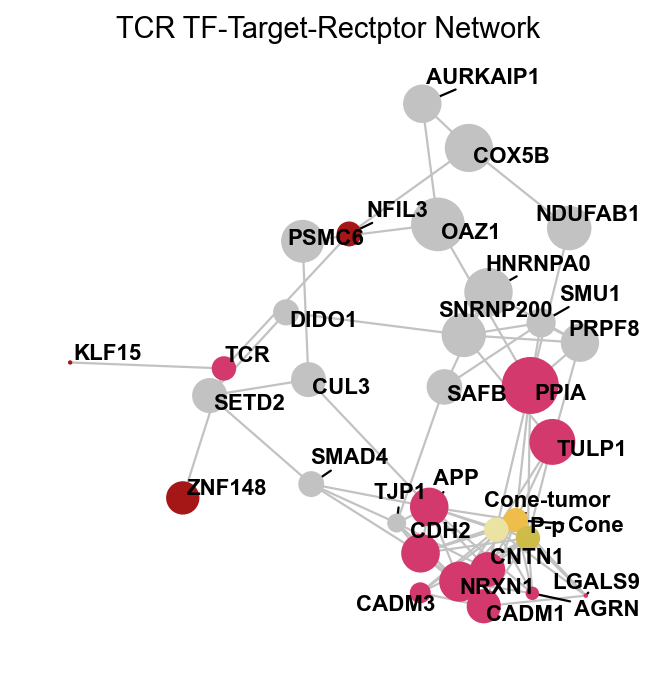

In [76]:
fig, ax = plt.subplots(figsize=(5,5)) 
pos = nx.spring_layout(editable_subgraph, scale=1, k=0.5)
#pos = nx.nx_agraph.graphviz_layout(subgraph, prog="twopi", args="")


#nodesize=np.array([G_nodes_dict[u] for u in G.nodes()])/nodesize_scale
#nodecolos=[type_color_all[u] for u in G.nodes()]
nx.draw_networkx_nodes(editable_subgraph, pos, nodelist=dict(editable_subgraph.nodes),
                       node_color=color_li,
                       node_size=nodesize*100,
                      )

#edgewidth = np.array([editable_subgraph.get_edge_data(u, v)['weight'] for u, v in editable_subgraph.edges()])
nx.draw_networkx_edges(editable_subgraph, pos,
                       #width=edgewidth,
                       edge_color='#c2c2c2')
plt.grid(False)
hub_gene=list(p_sub.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.title('TCR TF-Target-Rectptor Network',fontsize=13)

Text(0.5, 1.0, 'TCR TF-Target-Rectptor Network')

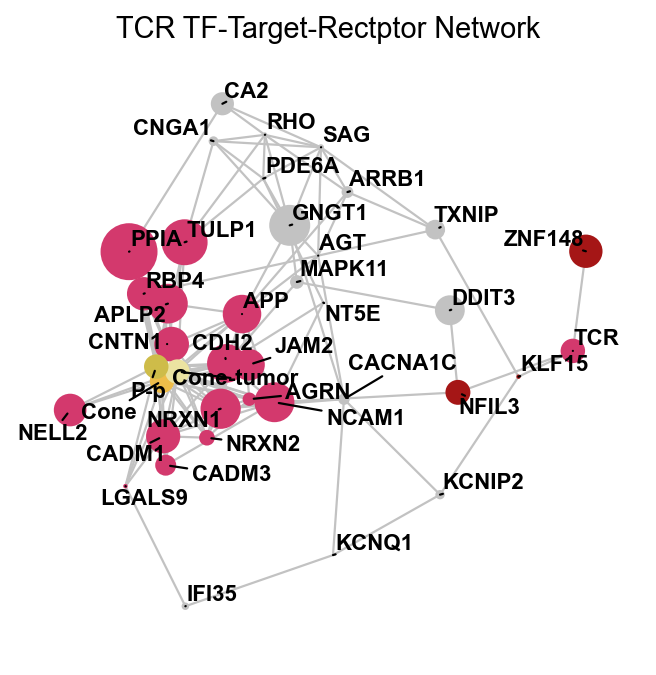

In [125]:
fig, ax = plt.subplots(figsize=(5,5)) 
pos = nx.spring_layout(editable_subgraph, scale=1, k=0.5)
#pos = nx.nx_agraph.graphviz_layout(subgraph, prog="twopi", args="")


#nodesize=np.array([G_nodes_dict[u] for u in G.nodes()])/nodesize_scale
#nodecolos=[type_color_all[u] for u in G.nodes()]
nx.draw_networkx_nodes(editable_subgraph, pos, nodelist=dict(editable_subgraph.nodes),
                       node_color=color_li,
                       node_size=nodesize*100,
                      )

#edgewidth = np.array([editable_subgraph.get_edge_data(u, v)['weight'] for u, v in editable_subgraph.edges()])
nx.draw_networkx_edges(editable_subgraph, pos,
                       #width=edgewidth,
                       edge_color='#c2c2c2')
plt.grid(False)
hub_gene=list(p_sub.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.title('TCR TF-Target-Rectptor Network',fontsize=13)

In [77]:
pathway_dict=ov.utils.geneset_prepare('/mnt/home/zehuazeng/analysis/placenta/genesets/GO_Biological_Process_2021.txt',organism='Human')

In [78]:
enr=ov.bulk.geneset_enrichment(gene_list=list(p_sub.keys()),
                                pathways_dict=pathway_dict,
                                pvalue_type='normal',
                                organism='human')

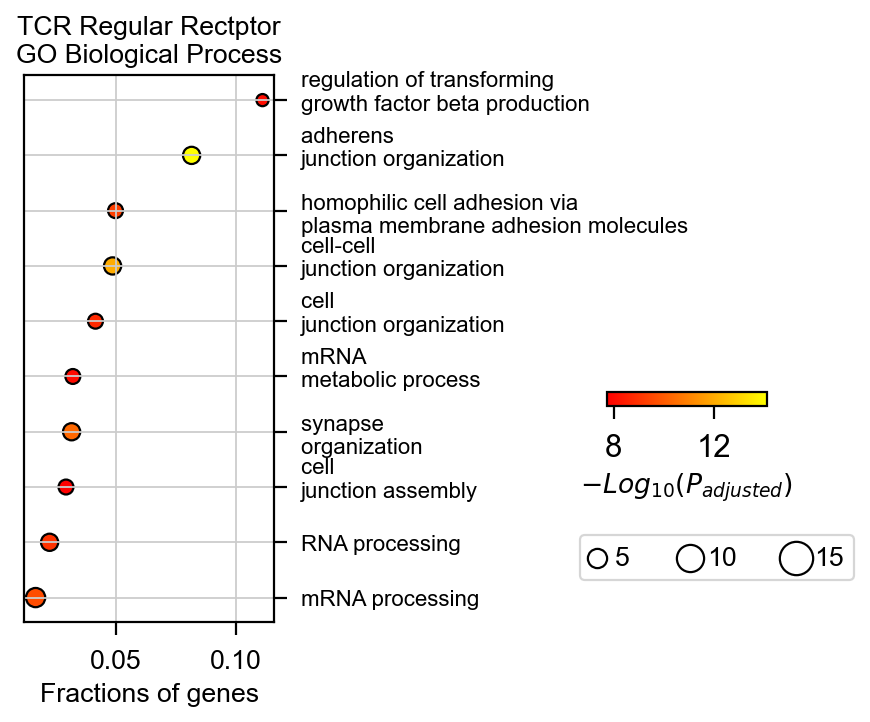

In [81]:
ax=ov.bulk.geneset_plot(enr,figsize=(2,4.5),fig_title='TCR Regular Rectptor\nGO Biological Process',
                    cax_loc=[2, 0.45, 0.5, 0.02],
                    bbox_to_anchor_used=(-0.25, -13),node_diameter=15,
                    cmap='autumn',custom_ticks=[8,12])
plt.grid(False)

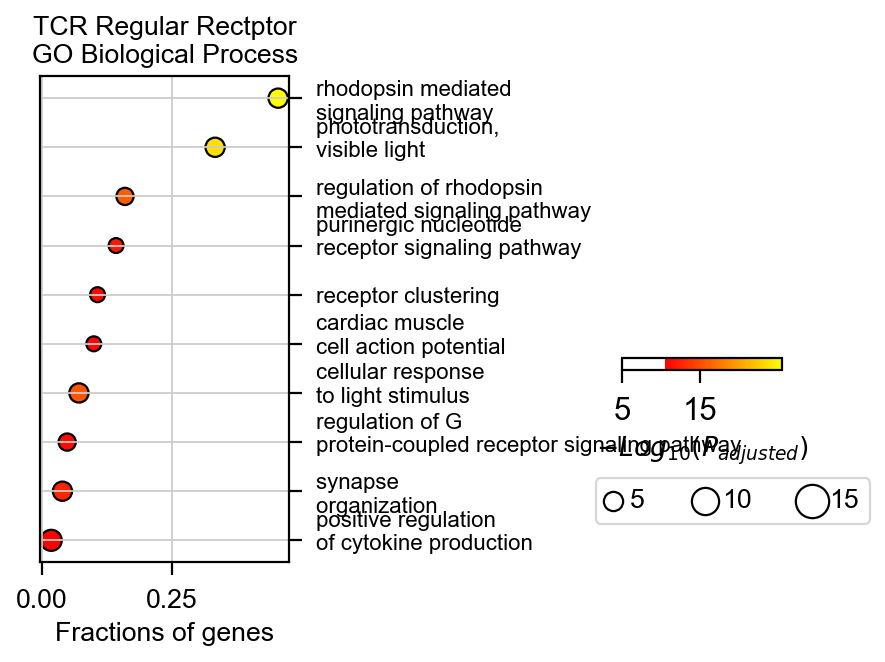

In [128]:
ax=ov.bulk.geneset_plot(enr,figsize=(2,4),fig_title='TCR Regular Rectptor\nGO Biological Process',
                    cax_loc=[2, 0.45, 0.5, 0.02],
                    bbox_to_anchor_used=(-0.25, -13),node_diameter=15,
                    cmap='autumn',custom_ticks=[5,15])
plt.grid(False)

## Middle

In [47]:
all_receptor=[]
for i in ['Middle']:
    all_receptor+=myeloid_dict[i]
    all_receptor=list(set(all_receptor))

In [48]:
all_receptor

['CADM3',
 'LRPAP1',
 'NRXN2',
 'AGRN',
 'PPIA',
 'CRTAM',
 'APP',
 'APLP2',
 'NRXN1',
 'RBP4',
 'ESAM',
 'NCAM1',
 'NELL2',
 'CNTN1',
 'TULP1',
 'LGALS9',
 'CADM1',
 'JAM2',
 'CDH2',
 'MDK']

In [49]:
string_db_ppi=ov.read('/mnt/home/yihanzhao/RB/data_new/TF-gene/string_interactions_short (3).tsv')
string_db_ppi.head()

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,AGRN,APP,9606.ENSP00000368678,9606.ENSP00000284981,0.0,0.0,0.0,0.000,0.117,0.226,0.0,0.305,0.483
1,AGRN,TBL1XR1,9606.ENSP00000368678,9606.ENSP00000405574,0.0,0.0,0.0,0.000,0.042,0.000,0.0,0.593,0.593
2,AGRN,NRXN1,9606.ENSP00000368678,9606.ENSP00000385142,0.0,0.0,0.0,0.555,0.000,0.000,0.0,0.644,0.644
3,AKAP17A,HNRNPA0,9606.ENSP00000324827,9606.ENSP00000316042,0.0,0.0,0.0,0.000,0.076,0.000,0.0,0.437,0.458
4,APP,CUL3,9606.ENSP00000284981,9606.ENSP00000264414,0.0,0.0,0.0,0.000,0.049,0.000,0.0,0.491,0.495


In [50]:
gene_list=all_receptor+all_TF_target

In [51]:
gene_type_dict=dict(zip(gene_list,['Type1']*len(all_receptor)+['Type2']*len(all_TF_target)))
gene_color_dict=dict(zip(gene_list,['#F7828A']*len(all_receptor)+['#9CCCA4']*len(all_TF_target)))

In [52]:
import networkx as nx
G = nx.Graph()
for tf in ['ZBTB14','KLF14','TFDP1']:
    G.add_edge('Middle',tf,weight=1)
    #for j in all_EBF1_target.index.tolist():
       # G.add_edge(tf,all_EBF1_target,weight=1)

for i in string_db_ppi.index:
    G.add_edge(string_db_ppi.loc[i,'#node1'],
              string_db_ppi.loc[i,'node2'],weight=1)

In [53]:
p=dict(G.nodes)
#p
color_li=[]
interest_gene=['Middle']
interest_ligand=[]
for i in p.keys():
    if i in ['ZBTB14','KLF14','TFDP1']:
        color_li.append('#a51616')
        interest_gene.append(i)
    elif i in all_receptor:
        color_li.append(ov.pl.green_color[2])
        interest_gene.append(i)
        interest_ligand.append(i)
    else:
        color_li.append('#c2c2c2')
interest_gene=set(interest_gene)

In [54]:
interest_gene

{'AGRN',
 'APP',
 'CADM1',
 'CADM3',
 'CDH2',
 'CNTN1',
 'KLF14',
 'LGALS9',
 'Middle',
 'NRXN1',
 'PPIA',
 'TFDP1',
 'TULP1',
 'ZBTB14'}

In [55]:
nodes_of_interest = interest_gene

# Find the shortest paths between all pairs of interest
# and collect all the nodes that are part of these paths.
all_nodes_to_include = set(nodes_of_interest)
for source in nodes_of_interest:
    for target in nodes_of_interest:
        if source != target:
            try:
                # Find the shortest path between source and target
                path = nx.shortest_path(G, source=source, target=target)
                # Add the nodes in the path to the set of nodes to include
                all_nodes_to_include.update(path)
            except nx.NetworkXNoPath:
                # No path exists between `source` and `target`, so nothing to add
                pass

# Create the subgraph
subgraph = G.subgraph(all_nodes_to_include)

In [56]:
p_sub=dict(subgraph.nodes)
#p
color_li=[]
interest_ligand=[]
for i in p_sub.keys():
    if i in ['ZBTB14','KLF14','TFDP1','Middle']:
        color_li.append('#a51616')
        #interest_gene.append(i)
    elif i in all_receptor:
        color_li.append(ov.pl.green_color[2])
        interest_ligand.append(i)
        #interest_gene.append(i)
    else:
        color_li.append('#c2c2c2')

In [57]:
import networkx as nx
editable_subgraph = nx.Graph(subgraph)
myeloid_dict={}
for i in ['Middle',]:
    #myeloid_dict[i]=[]
    if '+' in i:
        name=i[:-1]
        receptor_names=sub_means.columns[sub_means.columns.str.contains(f'{name}\+\|')].tolist()
    else:
        receptor_names=sub_means.columns[sub_means.columns.str.contains(f'{i}\|')].tolist()
    receptor_sub=sub_means[sub_means.columns[:10].tolist()+receptor_names]
    for j in receptor_sub.index:
        if receptor_sub.loc[j,receptor_names].sum()>0:
            
            for rece in receptor_names:
                if receptor_sub.loc[j,rece]>0:
                    if receptor_sub.loc[j,'gene_a'] in interest_ligand:
                        editable_subgraph.add_edge(receptor_sub.loc[j,'gene_a'],rece.split('|')[1],
                                                  weight=1
                                                  )

In [58]:
p_sub=dict(editable_subgraph.nodes)
#p
color_li=[]
interest_ligand=[]
for i in p_sub.keys():
    if i in ['ZBTB14','KLF14','TFDP1','Middle']:
        if i in color_dict.keys():
            color_li.append(color_dict[i])
        else:
            color_li.append('#a51616')
        #interest_gene.append(i)
    elif i in all_receptor:
        color_li.append(color_dict['Middle'])
        interest_ligand.append(i)
        #interest_gene.append(i)
    elif i in ['P-p','Cone', 'Cone-tumor']:
        color_li.append(color_dict[i])
    else:
        color_li.append('#c2c2c2')

In [59]:
nodesize=[]
for i in p_sub.keys():
    if i in rna.var_names:
        nodesize.append(rna[rna.obs.loc[rna.obs['celltype'].isin(['Middle'])].index,i].X.mean())
    else:
        nodesize.append(1)
import numpy as np
nodesize=np.array(nodesize)

Text(0.5, 1.0, 'Middle TF-Target-Rectptor Network')

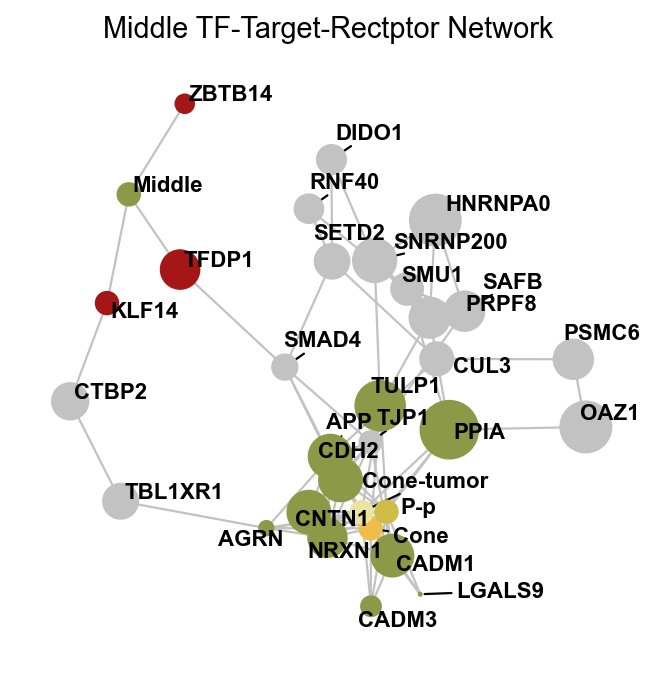

In [64]:
fig, ax = plt.subplots(figsize=(5,5)) 
pos = nx.spring_layout(editable_subgraph, scale=1, k=0.5)
#pos = nx.nx_agraph.graphviz_layout(subgraph, prog="twopi", args="")


#nodesize=np.array([G_nodes_dict[u] for u in G.nodes()])/nodesize_scale
#nodecolos=[type_color_all[u] for u in G.nodes()]
nx.draw_networkx_nodes(editable_subgraph, pos, nodelist=dict(editable_subgraph.nodes),
                       node_color=color_li,
                       node_size=nodesize*100,
                      )

#edgewidth = np.array([editable_subgraph.get_edge_data(u, v)['weight'] for u, v in editable_subgraph.edges()])
nx.draw_networkx_edges(editable_subgraph, pos,
                       #width=edgewidth,
                       edge_color='#c2c2c2')
plt.grid(False)
hub_gene=list(p_sub.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.title('Middle TF-Target-Rectptor Network',fontsize=13)

Text(0.5, 1.0, 'Middle TF-Target-Rectptor Network')

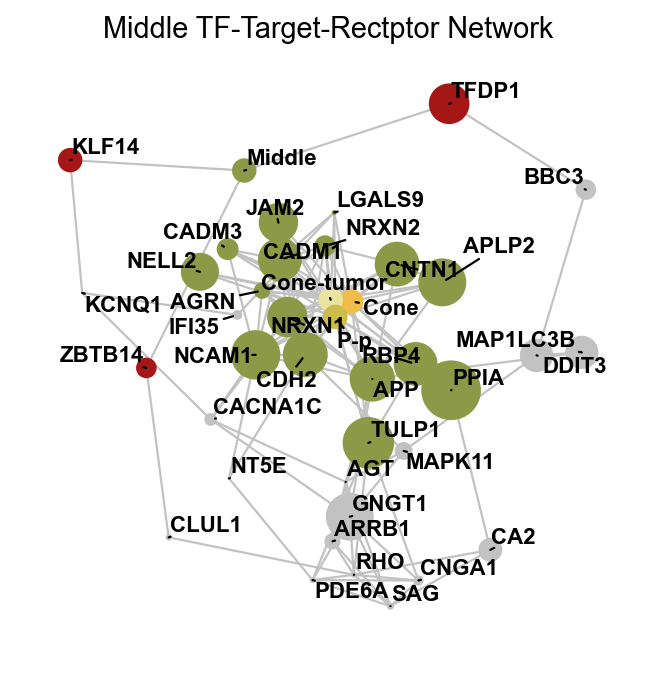

In [64]:
fig, ax = plt.subplots(figsize=(5,5)) 
pos = nx.spring_layout(editable_subgraph, scale=1, k=0.5)
#pos = nx.nx_agraph.graphviz_layout(subgraph, prog="twopi", args="")


#nodesize=np.array([G_nodes_dict[u] for u in G.nodes()])/nodesize_scale
#nodecolos=[type_color_all[u] for u in G.nodes()]
nx.draw_networkx_nodes(editable_subgraph, pos, nodelist=dict(editable_subgraph.nodes),
                       node_color=color_li,
                       node_size=nodesize*100,
                      )

#edgewidth = np.array([editable_subgraph.get_edge_data(u, v)['weight'] for u, v in editable_subgraph.edges()])
nx.draw_networkx_edges(editable_subgraph, pos,
                       #width=edgewidth,
                       edge_color='#c2c2c2')
plt.grid(False)
hub_gene=list(p_sub.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.title('Middle TF-Target-Rectptor Network',fontsize=13)

In [60]:
pathway_dict=ov.utils.geneset_prepare('/mnt/home/yihanzhao/RB/WikiPathway_2021_Human.txt',organism='Human')

In [61]:
enr=ov.bulk.geneset_enrichment(gene_list=list(p_sub.keys()),
                                pathways_dict=pathway_dict,
                                pvalue_type='normal',
                                organism='human')

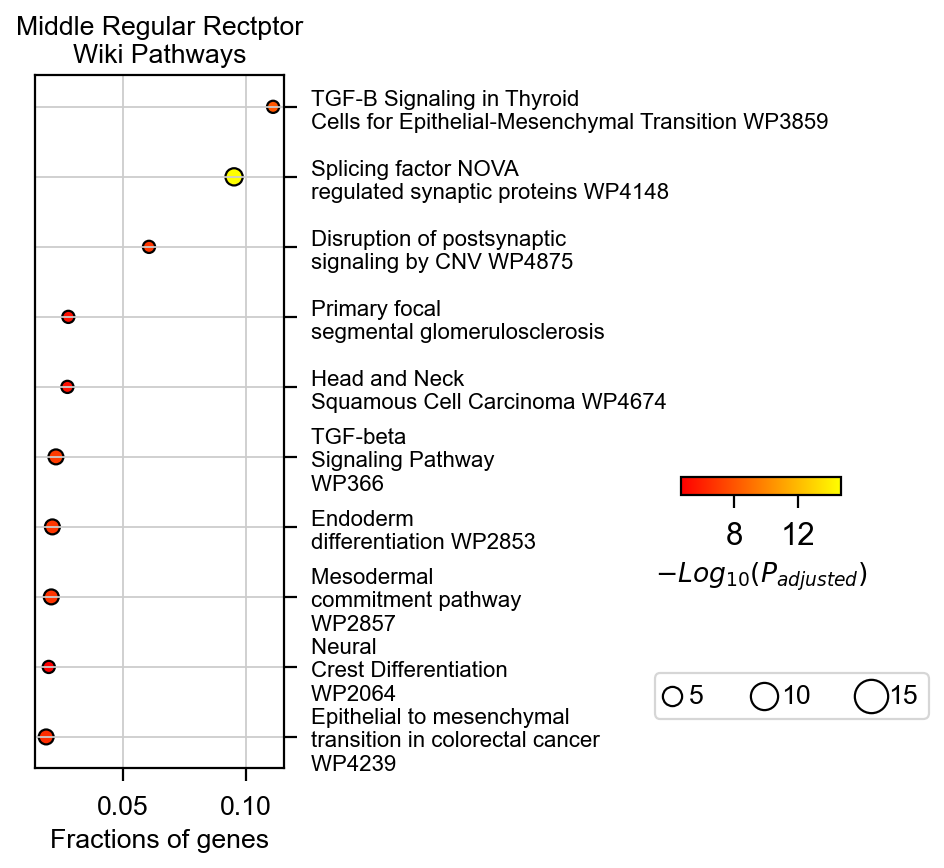

In [68]:
ax=ov.bulk.geneset_plot(enr,figsize=(2,5.7),fig_title='Middle Regular Rectptor\nWiki Pathways',
                    cax_loc=[2.2, 0.45, 0.5, 0.02],
                    bbox_to_anchor_used=(-0.25, -13),node_diameter=15,
                    cmap='autumn',custom_ticks=[8,12])
plt.grid(False)

In [115]:
pathway_dict=ov.utils.geneset_prepare('/mnt/home/yihanzhao/RB/WikiPathway_2021_Human.txt',organism='Human')

In [116]:
enr=ov.bulk.geneset_enrichment(gene_list=list(p_sub.keys()),
                                pathways_dict=pathway_dict,
                                pvalue_type='normal',
                                organism='human')

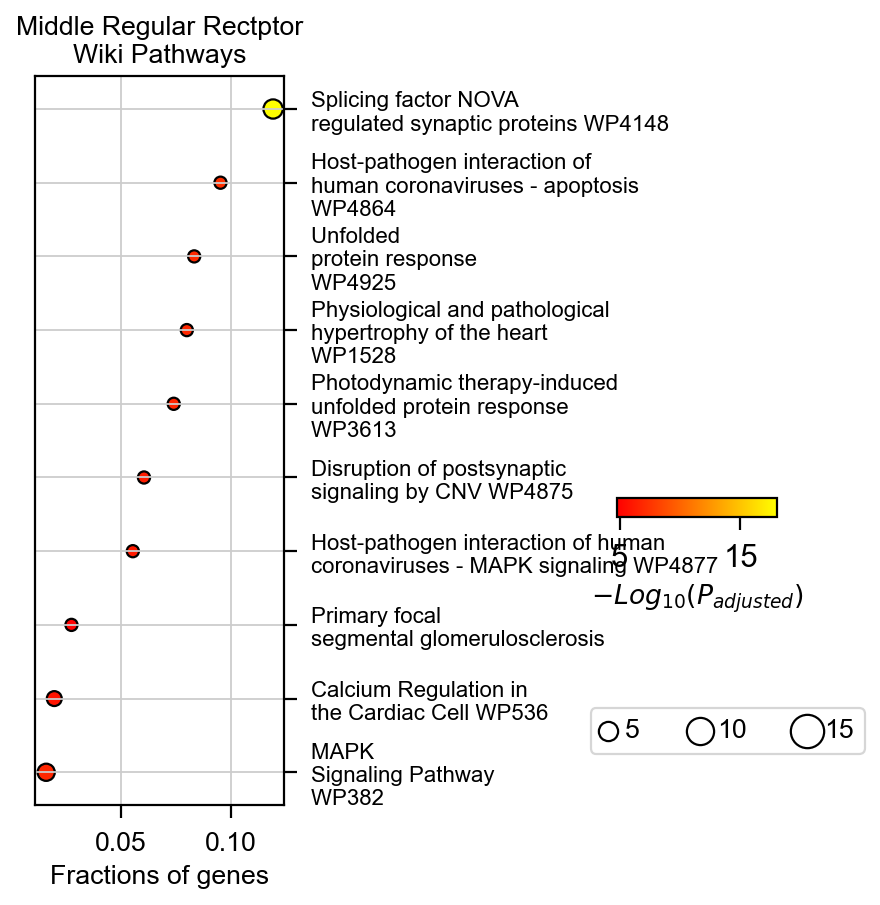

In [117]:
ax=ov.bulk.geneset_plot(enr,figsize=(2,6),fig_title='Middle Regular Rectptor\nWiki Pathways',
                    cax_loc=[2, 0.45, 0.5, 0.02],
                    bbox_to_anchor_used=(-0.25, -13),node_diameter=15,
                    cmap='autumn',custom_ticks=[5,15])
plt.grid(False)

## Rod pre

In [48]:
all_receptor=[]
for i in ['Rod pre']:
    all_receptor+=myeloid_dict[i]
    all_receptor=list(set(all_receptor))

In [49]:
all_receptor

['TULP1',
 'CRTAM',
 'CNTN1',
 'NRXN1',
 'MDK',
 'NRXN2',
 'NCAM1',
 'JAM2',
 'LRPAP1',
 'PPIA',
 'NELL2',
 'LGALS9',
 'CDH2',
 'AGRN',
 'CADM3',
 'APLP2',
 'CADM1',
 'APP',
 'RBP4']

In [50]:
gene_list=all_receptor+all_TF_target

In [51]:
string_db_ppi=ov.read('/mnt/home/yihanzhao/RB/data_new/TF-gene/string_interactions_short (4).tsv')
string_db_ppi.head()

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,AGRN,APP,9606.ENSP00000368678,9606.ENSP00000284981,0.0,0.0,0.0,0.000,0.117,0.226,0.0,0.305,0.483
1,AGRN,TBL1XR1,9606.ENSP00000368678,9606.ENSP00000405574,0.0,0.0,0.0,0.000,0.042,0.000,0.0,0.593,0.593
2,AGRN,NRXN1,9606.ENSP00000368678,9606.ENSP00000385142,0.0,0.0,0.0,0.555,0.000,0.000,0.0,0.644,0.644
3,AKAP17A,HNRNPA0,9606.ENSP00000324827,9606.ENSP00000316042,0.0,0.0,0.0,0.000,0.076,0.000,0.0,0.437,0.458
4,APP,CUL3,9606.ENSP00000284981,9606.ENSP00000264414,0.0,0.0,0.0,0.000,0.049,0.000,0.0,0.491,0.495


In [52]:
gene_type_dict=dict(zip(gene_list,['Type1']*len(all_receptor)+['Type2']*len(all_TF_target)))
gene_color_dict=dict(zip(gene_list,['#F7828A']*len(all_receptor)+['#9CCCA4']*len(all_TF_target)))

In [53]:
import networkx as nx
G = nx.Graph()
for tf in ['YY2','YY1','ZNF140']:
    G.add_edge('Rod pre',tf,weight=1)
    #for j in all_EBF1_target.index.tolist():
       # G.add_edge(tf,all_EBF1_target,weight=1)

for i in string_db_ppi.index:
    G.add_edge(string_db_ppi.loc[i,'#node1'],
              string_db_ppi.loc[i,'node2'],weight=1)

In [54]:
p=dict(G.nodes)
#p
color_li=[]
interest_gene=['Rod pre']
interest_ligand=[]
for i in p.keys():
    if i in ['YY2','YY1','ZNF140']:
        color_li.append('#a51616')
        interest_gene.append(i)
    elif i in all_receptor:
        color_li.append(ov.pl.green_color[2])
        interest_gene.append(i)
        interest_ligand.append(i)
    else:
        color_li.append('#c2c2c2')
interest_gene=set(interest_gene)

In [55]:
nodes_of_interest = interest_gene

# Find the shortest paths between all pairs of interest
# and collect all the nodes that are part of these paths.
all_nodes_to_include = set(nodes_of_interest)
for source in nodes_of_interest:
    for target in nodes_of_interest:
        if source != target:
            try:
                # Find the shortest path between source and target
                path = nx.shortest_path(G, source=source, target=target)
                # Add the nodes in the path to the set of nodes to include
                all_nodes_to_include.update(path)
            except nx.NetworkXNoPath:
                # No path exists between `source` and `target`, so nothing to add
                pass

# Create the subgraph
subgraph = G.subgraph(all_nodes_to_include)

In [56]:
p_sub=dict(subgraph.nodes)
#p
color_li=[]
interest_ligand=[]
for i in p_sub.keys():
    if i in ['YY2','YY1','ZNF140','Rod pre']:
        color_li.append('#a51616')
        #interest_gene.append(i)
    elif i in all_receptor:
        color_li.append(ov.pl.green_color[2])
        interest_ligand.append(i)
        #interest_gene.append(i)
    else:
        color_li.append('#c2c2c2')

In [57]:
import networkx as nx
editable_subgraph = nx.Graph(subgraph)
myeloid_dict={}
for i in ['Rod pre',]:
    #myeloid_dict[i]=[]
    if '+' in i:
        name=i[:-1]
        receptor_names=sub_means.columns[sub_means.columns.str.contains(f'{name}\+\|')].tolist()
    else:
        receptor_names=sub_means.columns[sub_means.columns.str.contains(f'{i}\|')].tolist()
    receptor_sub=sub_means[sub_means.columns[:10].tolist()+receptor_names]
    for j in receptor_sub.index:
        if receptor_sub.loc[j,receptor_names].sum()>0:
            
            for rece in receptor_names:
                if receptor_sub.loc[j,rece]>0:
                    if receptor_sub.loc[j,'gene_a'] in interest_ligand:
                        editable_subgraph.add_edge(receptor_sub.loc[j,'gene_a'],rece.split('|')[1],
                                                  weight=1
                                                  )

In [58]:
p_sub=dict(editable_subgraph.nodes)
#p
color_li=[]
interest_ligand=[]
for i in p_sub.keys():
    if i in ['YY2','YY1','ZNF140','Rod pre']:
        if i in color_dict.keys():
            color_li.append(color_dict[i])
        else:
            color_li.append('#a51616')
        #interest_gene.append(i)
    elif i in all_receptor:
        color_li.append(color_dict['Rod pre'])
        interest_ligand.append(i)
        #interest_gene.append(i)
    elif i in ['P-p','Cone', 'Cone-tumor']:
        color_li.append(color_dict[i])
    else:
        color_li.append('#c2c2c2')

In [59]:
nodesize=[]
for i in p_sub.keys():
    if i in rna.var_names:
        nodesize.append(rna[rna.obs.loc[rna.obs['celltype'].isin(['Rod pre'])].index,i].X.mean())
    else:
        nodesize.append(1)
import numpy as np
nodesize=np.array(nodesize)

Text(0.5, 1.0, 'Rod pre TF-Target-Rectptor Network')

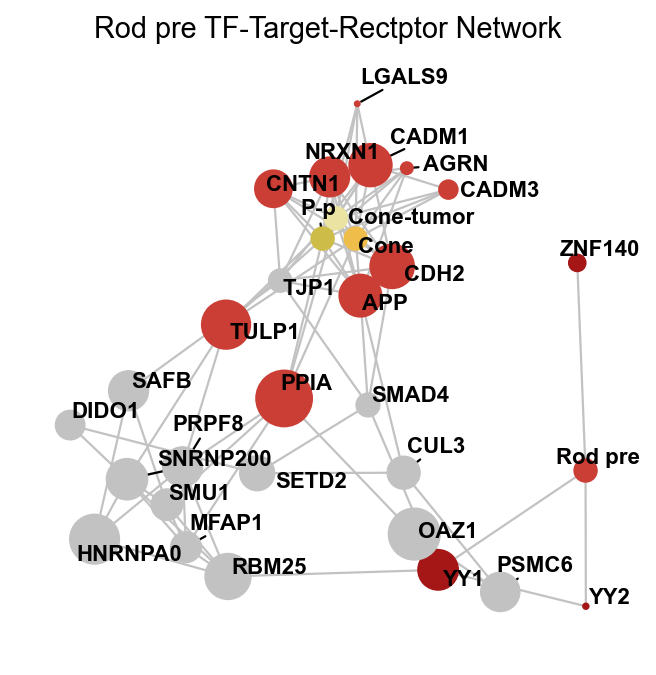

In [61]:
fig, ax = plt.subplots(figsize=(5,5)) 
pos = nx.spring_layout(editable_subgraph, scale=1, k=0.5)
#pos = nx.nx_agraph.graphviz_layout(subgraph, prog="twopi", args="")


#nodesize=np.array([G_nodes_dict[u] for u in G.nodes()])/nodesize_scale
#nodecolos=[type_color_all[u] for u in G.nodes()]
nx.draw_networkx_nodes(editable_subgraph, pos, nodelist=dict(editable_subgraph.nodes),
                       node_color=color_li,
                       node_size=nodesize*100,
                      )

#edgewidth = np.array([editable_subgraph.get_edge_data(u, v)['weight'] for u, v in editable_subgraph.edges()])
nx.draw_networkx_edges(editable_subgraph, pos,
                       #width=edgewidth,
                       edge_color='#c2c2c2')
plt.grid(False)
hub_gene=list(p_sub.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.title('Rod pre TF-Target-Rectptor Network',fontsize=13)

Text(0.5, 1.0, 'Rod pre TF-Target-Rectptor Network')

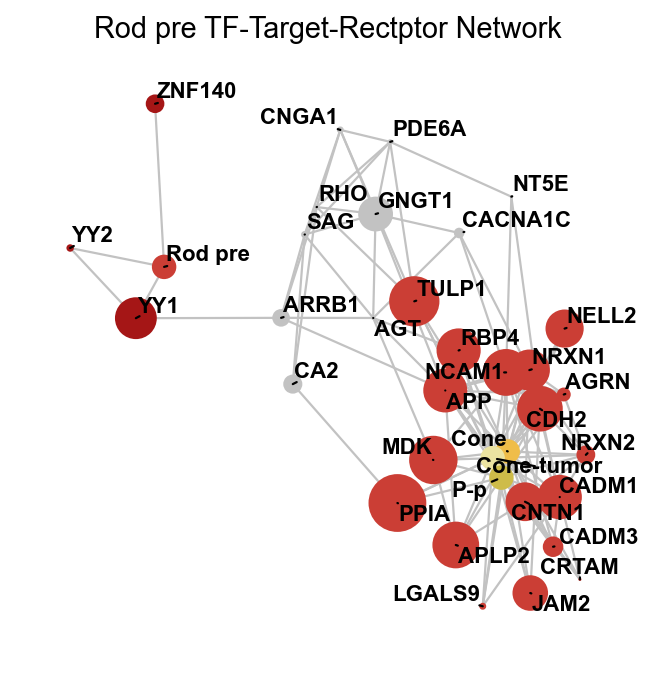

In [62]:
fig, ax = plt.subplots(figsize=(5,5)) 
pos = nx.spring_layout(editable_subgraph, scale=1, k=0.5)
#pos = nx.nx_agraph.graphviz_layout(subgraph, prog="twopi", args="")


#nodesize=np.array([G_nodes_dict[u] for u in G.nodes()])/nodesize_scale
#nodecolos=[type_color_all[u] for u in G.nodes()]
nx.draw_networkx_nodes(editable_subgraph, pos, nodelist=dict(editable_subgraph.nodes),
                       node_color=color_li,
                       node_size=nodesize*100,
                      )

#edgewidth = np.array([editable_subgraph.get_edge_data(u, v)['weight'] for u, v in editable_subgraph.edges()])
nx.draw_networkx_edges(editable_subgraph, pos,
                       #width=edgewidth,
                       edge_color='#c2c2c2')
plt.grid(False)
hub_gene=list(p_sub.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.title('Rod pre TF-Target-Rectptor Network',fontsize=13)

In [64]:
pathway_dict=ov.utils.geneset_prepare('/mnt/home/zehuazeng/analysis/placenta/genesets/GO_Molecular_Function_2021.txt',organism='Human')

In [65]:
enr=ov.bulk.geneset_enrichment(gene_list=list(p_sub.keys()),
                                pathways_dict=pathway_dict,
                                pvalue_type='normal',
                                organism='human')

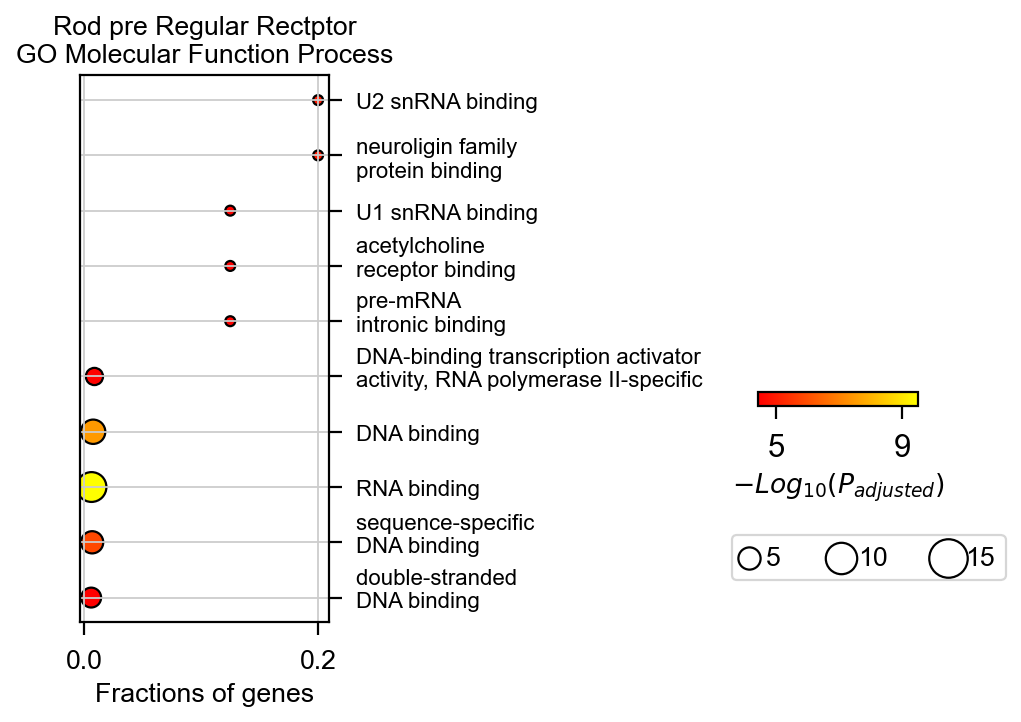

In [71]:
ax=ov.bulk.geneset_plot(enr,figsize=(2,4.5),fig_title='Rod pre Regular Rectptor\nGO Molecular Function Process',
                    cax_loc=[2.3, 0.45, 0.5, 0.02],
                    bbox_to_anchor_used=(-0.25, -13),node_diameter=20,
                    cmap='autumn',custom_ticks=[5,9])
plt.grid(False)

In [63]:
pathway_dict=ov.utils.geneset_prepare('/mnt/home/zehuazeng/analysis/placenta/genesets/GO_Molecular_Function_2021.txt',organism='Human')

In [64]:
enr=ov.bulk.geneset_enrichment(gene_list=list(p_sub.keys()),
                                pathways_dict=pathway_dict,
                                pvalue_type='normal',
                                organism='human')

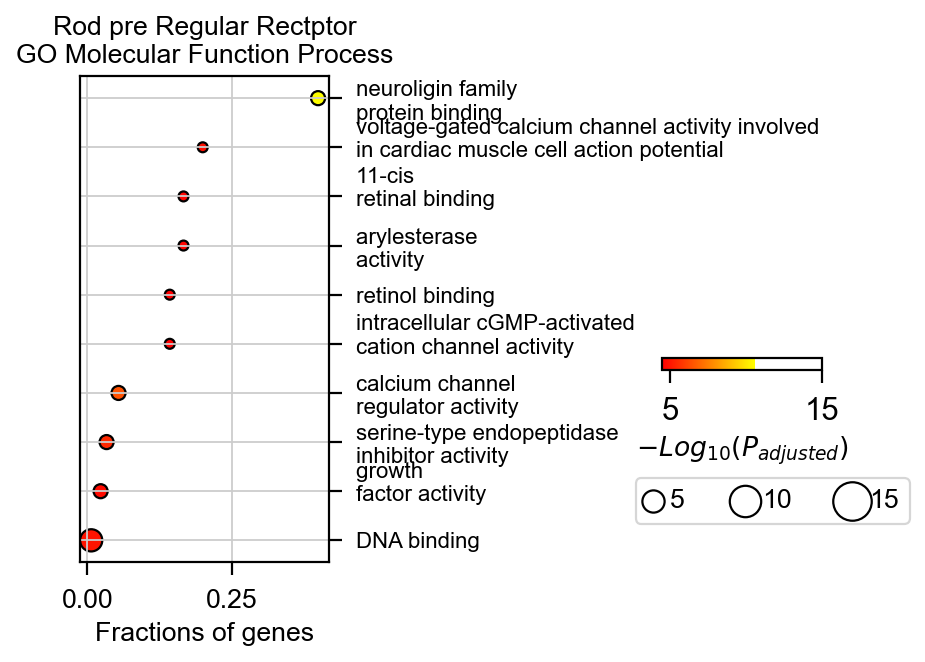

In [67]:
ax=ov.bulk.geneset_plot(enr,figsize=(2,4),fig_title='Rod pre Regular Rectptor\nGO Molecular Function Process',
                    cax_loc=[2, 0.45, 0.5, 0.02],
                    bbox_to_anchor_used=(-0.25, -13),node_diameter=20,
                    cmap='autumn',custom_ticks=[5,15])
plt.grid(False)